# 랜덤 포레스트(RandomForest)

랜덤포레스트는 의사결정트리의 주요 단점인 훈련 데이터에 대한 과대적합을 회피할수 있는 방법이다.

랜덤 포레스트는 기본적으로 조금씩 다른 여러 결정 트리의 묶음이다. 서로 다른 방향으로 과대적합된 트리를 많이 만들면 그 결과를 평균냄으로써 과대적합된 양을 줄일 수 있다.

### 랜덤 포레스트 구축

랜덤 포레스트 모델을 만들려면 생성할 트리의 개수를 정해야 한다. 이 트리들은 완전히 독립적으로 만들어져야 하므로 알고리즘은 각 트리가 고유하게 만들어지도록 무작휘한 선택을 한다. 

트리를 만들기 위해서는 먼저 데이터의 부트스트랩 샘플(bootstrap sample)을 생성한다. 다시 말해 n_samples개의 데이터 포인트에서 무작위로 데이터를 n_sample 횟수만큼 반복 추출하는 것이다.(한 샘플이 여러 번 중복 추출될 수도 있다.) 이 데이터 셋은 원래 데이터셋 크기와 같지만, 어떤 데이터 포인트는 누락될수도 있고 어떤 데이터 포인트는 중복되어 들어 있을 수 있다.

예를 들면 리스트 [a,b,c,d]에서 부트스트랩 샘플을 만든다고 하자. 가능한 부트스트랩 샘플은 [b,d,d,c]도 될 수 있고 [d,a,d,a]와 같은 샘플도 만들어질수 있다.

그다음 이렇게 만든 데이터셋으로 결정트리를 만든다. 램덤 포레스트는 각 노드에서 전체 특성을 대상으로 최선의 테스트를 찾는 것이 아니고 알고리즘이 각 노드에서 후보 특성을 무작위로 선택한 후 이 후보들 중에서 최선의 테스트를 찾는다. 몇 개의 특성을 고를지는 max_features 매개변수로 조정할 수 있다.

### 랜덤 포레스트 분석

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import mglearn
import numpy as np

In [5]:
x,y = make_moons(n_samples= 100,noise= 0.25,random_state=3)

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify= y, random_state=42)

In [7]:
forest = RandomForestClassifier(n_estimators=5,random_state=2)
forest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

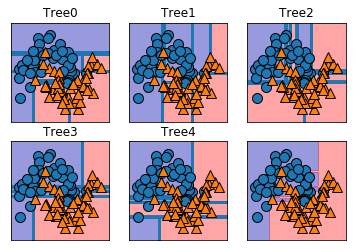

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
fig,axes = plt.subplots(2,3)
for i, (ax,tree) in enumerate(zip(axes.ravel(),forest.estimators_)):
    ax.set_title('Tree{}'.format(i))
    mglearn.plots.plot_tree_partition(x,y,tree,ax=ax)
mglearn.plots.plot_2d_separator(forest,x,fill=True, ax=axes[-1,-1],alpha=.4)
mglearn.discrete_scatter(x[:,0],x[:,1],y)

다섯 개의 트리가 만들 결정 경계가 확연하게 다르다는 것을 알 수 있다. 부트스트랩 샘플링 때문에 한쪽 트리에 나타나는 훈련 포인트가 다른 트리에는 포함되지 않을 수 있어 각 트리는 불완전하다. 

랜덤 포레스트는 개개의 트리보다는 덜 과대적합되고 훨씬 좋은 결정 경계를 만들어준다. 실제 애플리케이션에서는 매우 많은 트리를 사용하기 때문에 더 부드러운 결정 경계가 만들어진다.

유방함 데이터셋에 100개의 트리로 이뤄진 랜더 포레스트를 적용해 보자.

In [22]:
from sklearn.datasets import load_breast_cancer
cancer =load_breast_cancer()

In [23]:
x_train,x_test,y_train,y_test =train_test_split(cancer.data, cancer.target,random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(x_train,y_train)

print("훈련 세트 정확도:{:.3f}".format(forest.score(x_train,y_train)))
print('테스트 세트 정확도:{:.3f}'.format(forest.score(x_test,y_test)))

훈련 세트 정확도:1.000
테스트 세트 정확도:0.972


랜덤 포레스트는 아무런 매개변수 튜닝 없이도 선형 모델이나 단일 결정 트리보다 높은 97%의 정확도를 내고 있다. 

랜덤 포레스트는 결정 트리처럼 특성 중요도를 제공하는 각 트리의 특성 중요도를 취합하여 계산한 것이다.

In [28]:
def  plot_feature_importance_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)

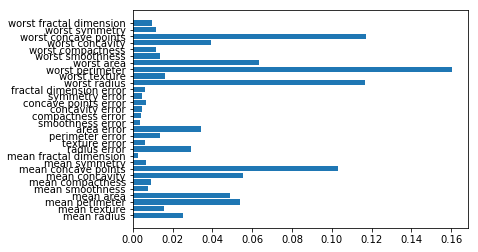

In [31]:
plot_feature_importance_cancer(forest)

랜덤 포레스트에서는 단일 트리의 경우보다 훨씬 많은 특성이 0 이상의 중요도 값을 갖는다. 랜덤 포레스트를 만드는 무작위성은 알고리즘이 가능성이 있는 많은 경우를 고려할 수 있도록 하므로, 그 결과 랜덤 포레스트가 단일 트리보다 더 넓은 시각으로 데이터를 바라볼수 있다.

#### 중요 매개변수

중요 매개변수는 n_estimators, max_features이고 max_depth 같은 사전 가지치기 옵션이 있다. n_estimators는 클수록 좋다. 더 많은 트리를 평균하면 과대적합을 줄여 더 안정적인 모델을 만든다. 하지만 많은 트리를 만들수록 더 많은 메모리와 시간이 든다. 

max_features는 각 트리가 얼마나 무작위가 될지 결정하며 작은 max_features는 과대적합을 줄여준다. 일반적으로 기본값을 쓰는 것이 좋다.